In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/46000-indian-companies-information-dataset/Companies_Information.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,7]

In [3]:
df = pd.read_csv('/kaggle/input/46000-indian-companies-information-dataset/Companies_Information.csv')
df.head()

,Unnamed: 0,company_name,rating,company_reviews,company_age,number_of_employees
0,0,TCS,3.9,(54.2k Reviews),55 years old,1 Lakh+ Employees (India)
1,1,TCS,3.9,(54.2k Reviews),55 years old,1 Lakh+ Employees (India)
2,2,Accenture,4.1,(34.4k Reviews),34 years old,1 Lakh+ Employees (India)
3,3,TCS,3.9,(54.2k Reviews),55 years old,1 Lakh+ Employees (India)
4,4,Accenture,4.1,(34.4k Reviews),34 years old,1 Lakh+ Employees (India)


In [4]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,company_name,rating,company_reviews,company_age,number_of_employees
0,TCS,3.9,(54.2k Reviews),55 years old,1 Lakh+ Employees (India)
1,TCS,3.9,(54.2k Reviews),55 years old,1 Lakh+ Employees (India)
2,Accenture,4.1,(34.4k Reviews),34 years old,1 Lakh+ Employees (India)
3,TCS,3.9,(54.2k Reviews),55 years old,1 Lakh+ Employees (India)
4,Accenture,4.1,(34.4k Reviews),34 years old,1 Lakh+ Employees (India)


In [5]:
df.shape

(46035, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46035 entries, 0 to 46034
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company_name         46035 non-null  object 
 1   rating               46035 non-null  float64
 2   company_reviews      46035 non-null  object 
 3   company_age          46035 non-null  object 
 4   number_of_employees  46035 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.8+ MB


In [7]:
# visualising and exploring the data


In [8]:
# company_name

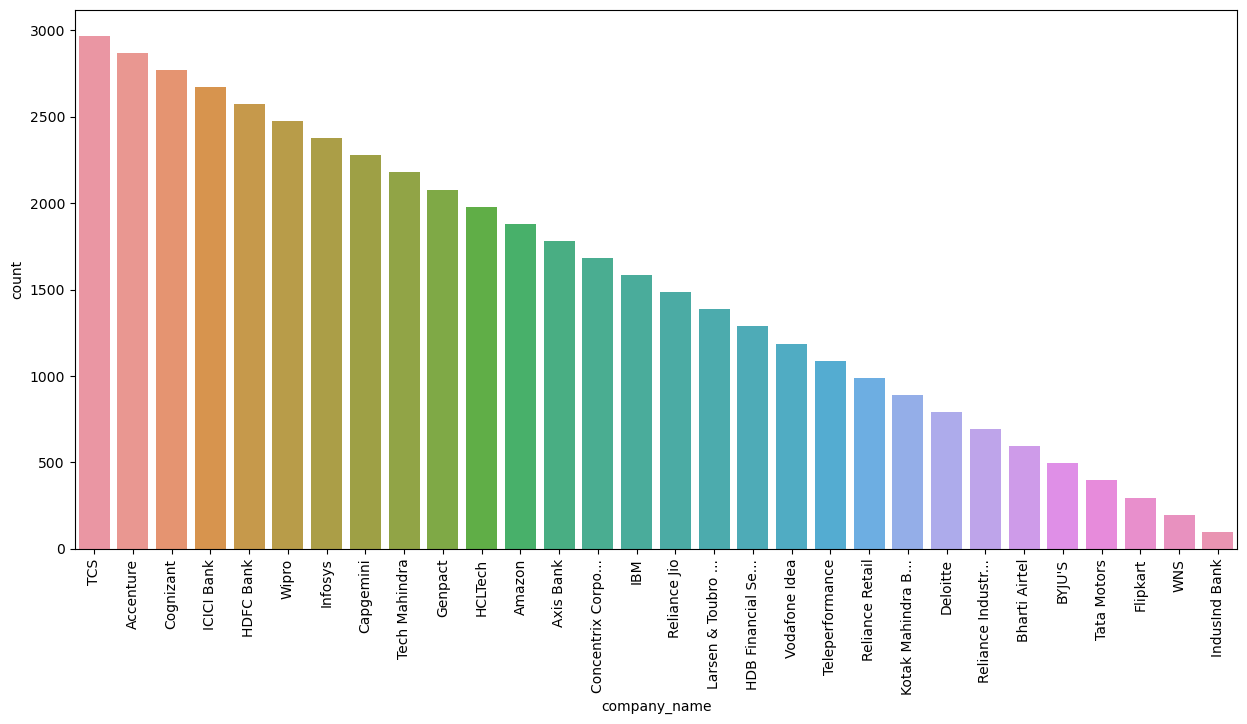

In [9]:
sns.countplot(data=df,x='company_name')
plt.xticks(rotation=90)
plt.show()

In [10]:
#rating

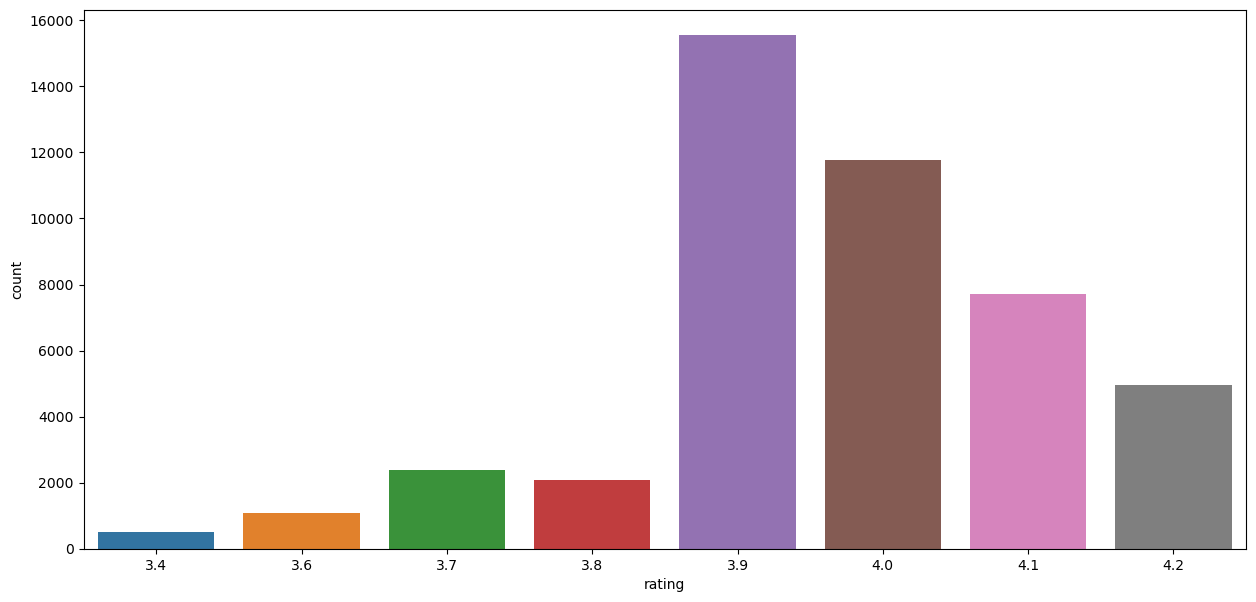

In [11]:
sns.countplot(x=df['rating'])
plt.show()

In [12]:
# company reviews

In [13]:
df['company_reviews'].nunique()

29

In [14]:
df['company_reviews']

0        (54.2k Reviews)
1        (54.2k Reviews)
2        (34.4k Reviews)
3        (54.2k Reviews)
4        (34.4k Reviews)
              ...       
46030    (14.4k Reviews)
46031    (12.5k Reviews)
46032    (12.8k Reviews)
46033     (7.4k Reviews)
46034       (7k Reviews)
Name: company_reviews, Length: 46035, dtype: object

def alter(x):
    for i in x:
        a1 = i.split(sep='k')
        return (int(a1[0][1:])*1000)


In [15]:
rev = []
for i in df['company_reviews']:
    a=i.split(sep='k')[0][1:]
    rev.append(float(a)*1000)


In [16]:
df['company_reviews'] = pd.Series(rev)
df.head()

,company_name,rating,company_reviews,company_age,number_of_employees
0,TCS,3.9,54200.0,55 years old,1 Lakh+ Employees (India)
1,TCS,3.9,54200.0,55 years old,1 Lakh+ Employees (India)
2,Accenture,4.1,34400.0,34 years old,1 Lakh+ Employees (India)
3,TCS,3.9,54200.0,55 years old,1 Lakh+ Employees (India)
4,Accenture,4.1,34400.0,34 years old,1 Lakh+ Employees (India)


In [17]:
df['company_reviews'] = df['company_reviews'].astype('int')

In [18]:
df.head()

,company_name,rating,company_reviews,company_age,number_of_employees
0,TCS,3.9,54200,55 years old,1 Lakh+ Employees (India)
1,TCS,3.9,54200,55 years old,1 Lakh+ Employees (India)
2,Accenture,4.1,34400,34 years old,1 Lakh+ Employees (India)
3,TCS,3.9,54200,55 years old,1 Lakh+ Employees (India)
4,Accenture,4.1,34400,34 years old,1 Lakh+ Employees (India)


In [19]:
df['company_age'] = df['company_age'].apply(lambda x:x[0:2])
df.head()

,company_name,rating,company_reviews,company_age,number_of_employees
0,TCS,3.9,54200,55,1 Lakh+ Employees (India)
1,TCS,3.9,54200,55,1 Lakh+ Employees (India)
2,Accenture,4.1,34400,34,1 Lakh+ Employees (India)
3,TCS,3.9,54200,55,1 Lakh+ Employees (India)
4,Accenture,4.1,34400,34,1 Lakh+ Employees (India)


In [20]:
df['company_age'] = df['company_age'].astype('int')

In [21]:
df['number_of_employees'].unique()

array(['1 Lakh+ Employees (India)', '50k-1 Lakh Employees (India)',
       '10k-50k Employees (India)', '1 Lakh+ Employees (Global)',
       '1k-5k Employees (India)'], dtype=object)

In [22]:
df.head()

,company_name,rating,company_reviews,company_age,number_of_employees
0,TCS,3.9,54200,55,1 Lakh+ Employees (India)
1,TCS,3.9,54200,55,1 Lakh+ Employees (India)
2,Accenture,4.1,34400,34,1 Lakh+ Employees (India)
3,TCS,3.9,54200,55,1 Lakh+ Employees (India)
4,Accenture,4.1,34400,34,1 Lakh+ Employees (India)


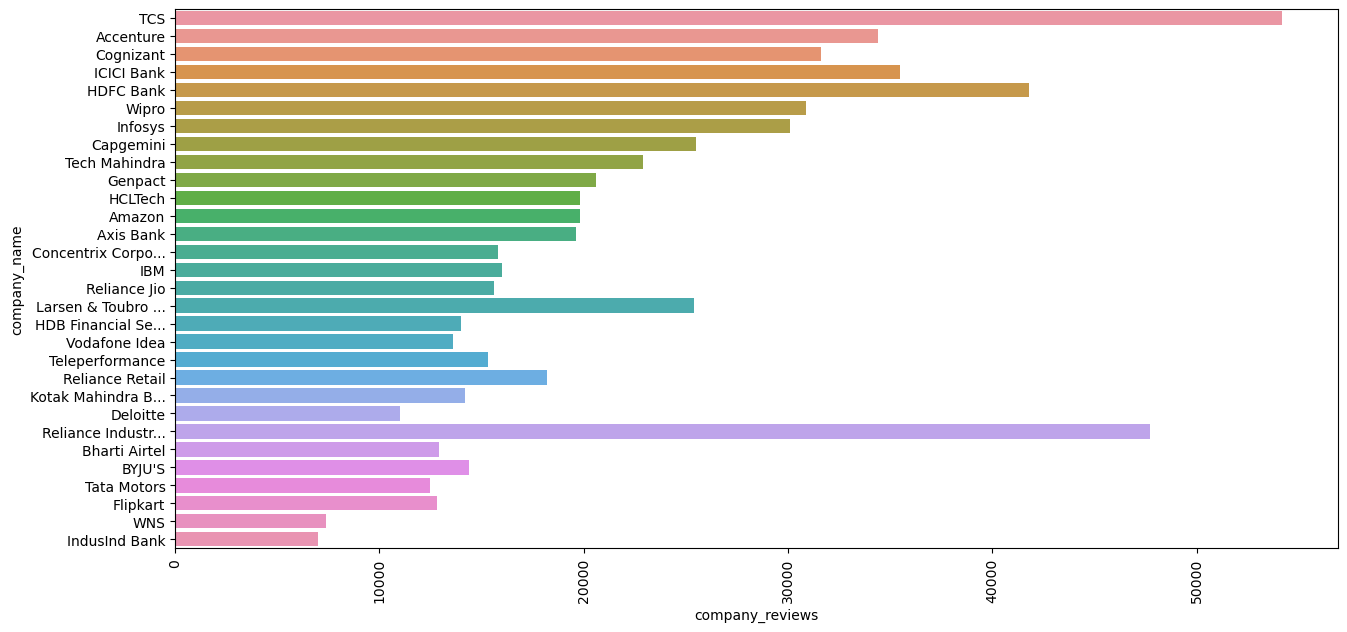

In [23]:
sns.barplot(y=df['company_name'],x=df['company_reviews'],data=df)
plt.xticks(rotation=90)
plt.show()

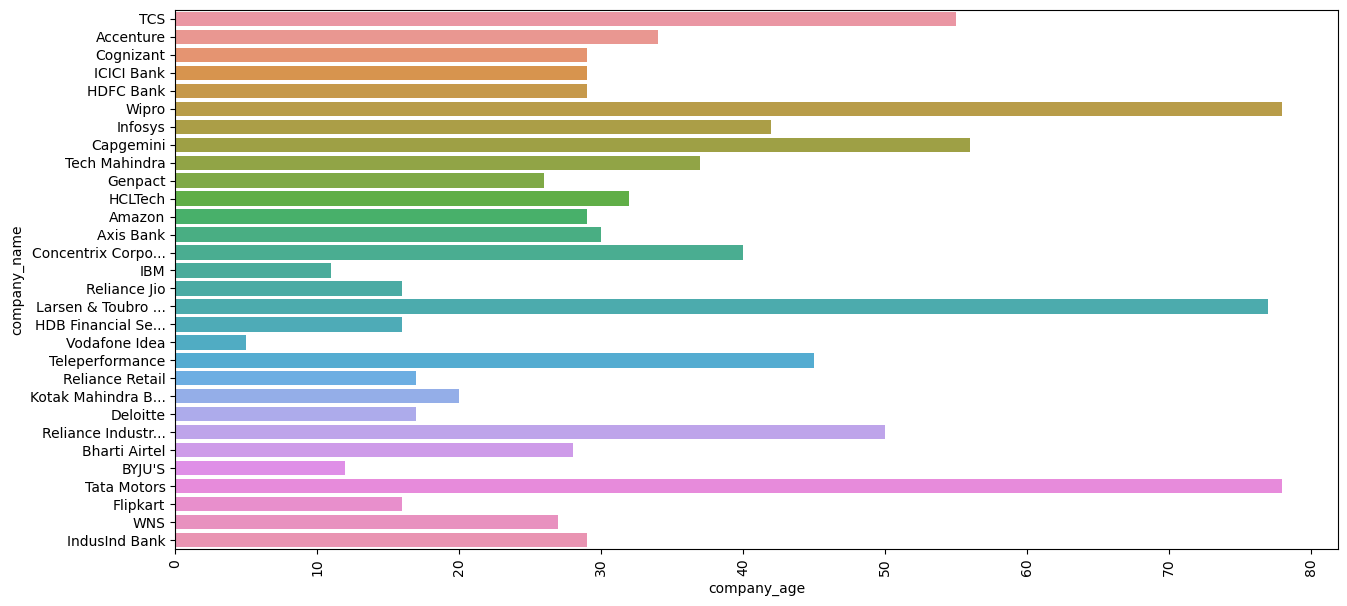

In [24]:
sns.barplot(y='company_name',x='company_age',data=df)
plt.xticks(rotation=90)
plt.show()

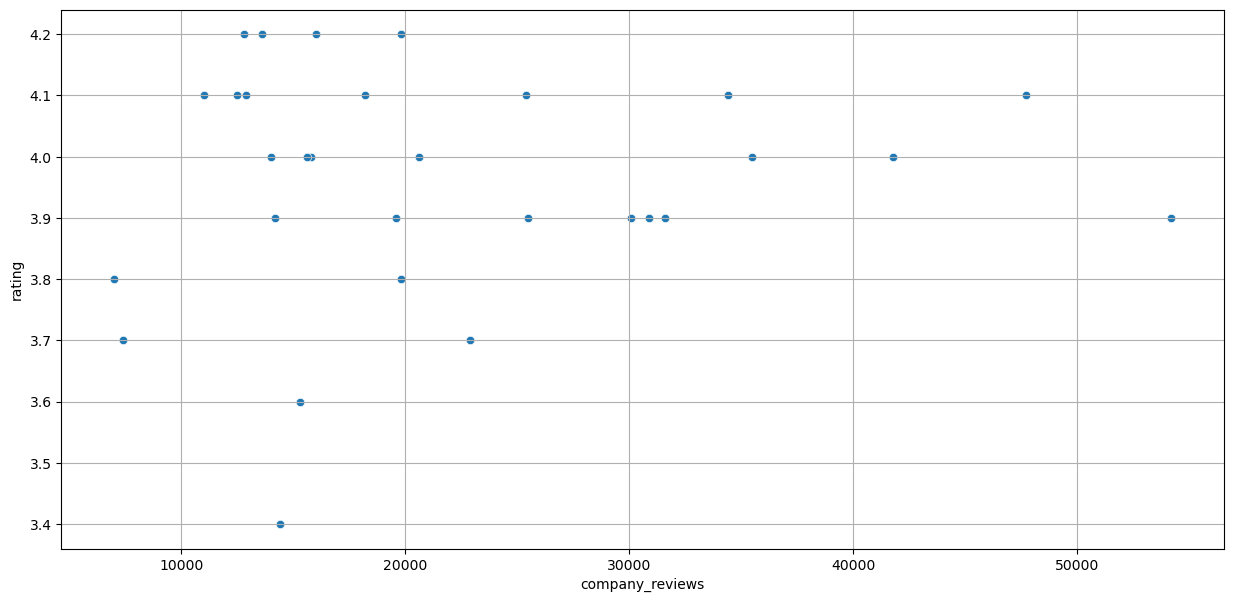

In [25]:
sns.scatterplot(x='company_reviews',y='rating',data=df)
plt.grid()
plt.show()

The skewness of company reviews is:  0.8331710663109653


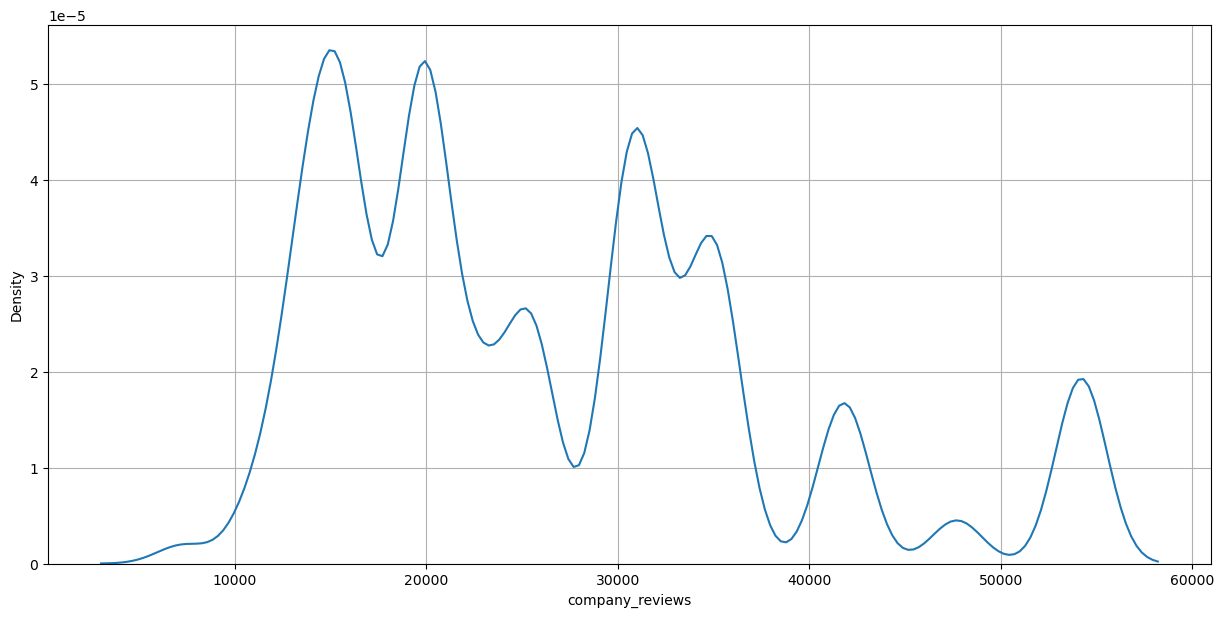

In [26]:
print("The skewness of company reviews is: ",df['company_reviews'].skew())
sns.kdeplot(df['company_reviews'])
plt.grid()
plt.show()

The skewness of company age is:  0.8553756542152293


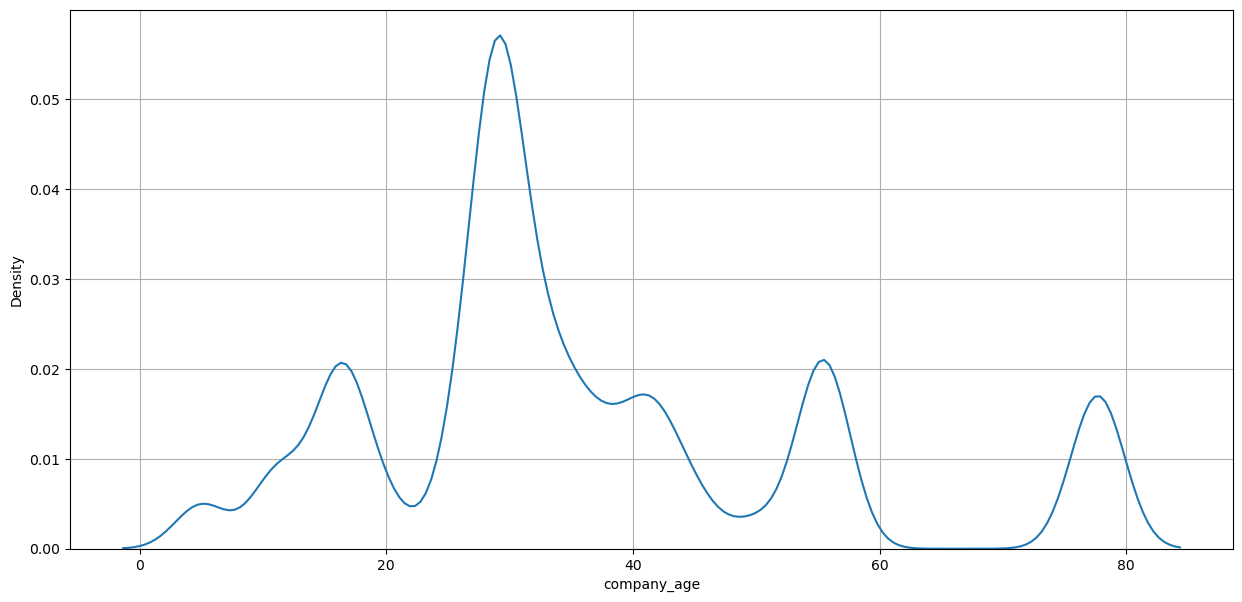

In [27]:
print("The skewness of company age is: ",df['company_age'].skew())
sns.kdeplot(df['company_age'])
plt.grid()
plt.show()

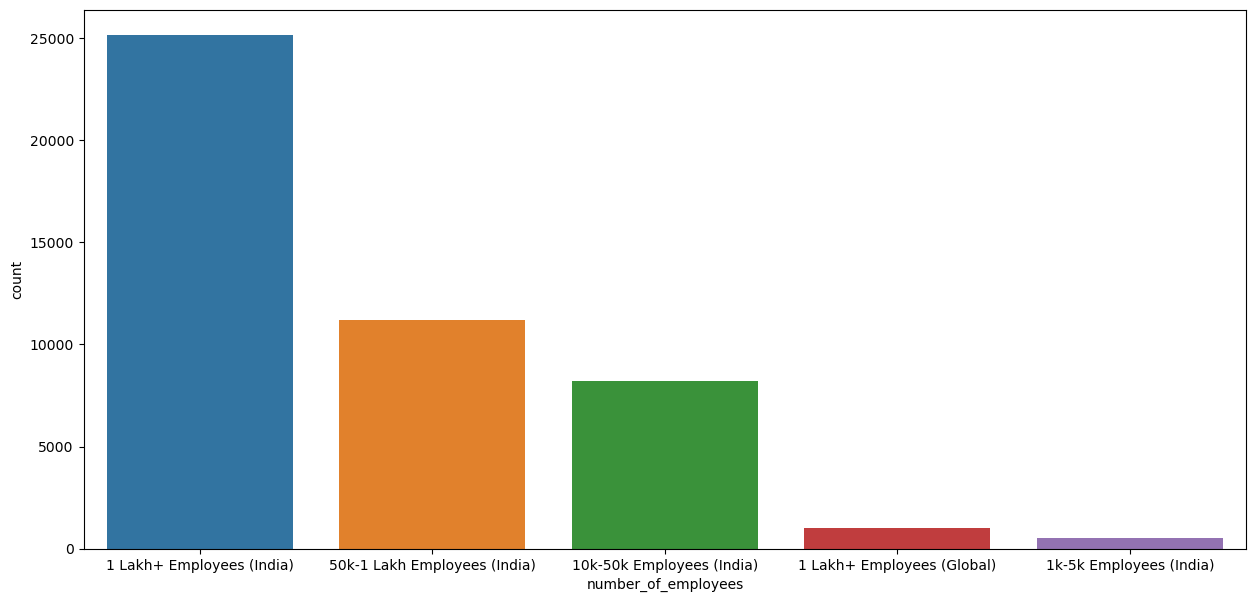

In [28]:
# employees

sns.countplot(x='number_of_employees',data=df)
plt.show()